In [18]:
import pandas as pd
import re
from io import StringIO
import matplotlib.pyplot as plt

In [19]:
epa = pd.read_csv(r"C:\Users\GPSantana\Downloads\EPA.csv", sep=";")

epa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Variable1  95 non-null     object
 1   Valor1     95 non-null     object
 2   Variable2  95 non-null     object
 3   Valor2     95 non-null     object
 4   Variable3  95 non-null     object
 5   Valor3     95 non-null     object
 6   Variable4  95 non-null     object
 7   Valor4     95 non-null     object
 8   Variable5  95 non-null     object
 9   Valor5     95 non-null     object
 10  PERIODO    95 non-null     object
 11  VALOR      95 non-null     object
dtypes: object(12)
memory usage: 9.0+ KB


In [20]:
epa=epa[["PERIODO","Valor5","VALOR"]]

epa

,PERIODO,Valor5,VALOR
0,2025T3,Ocupado/a,"22.387,1"
1,2025T2,Ocupado/a,"22.268,7"
2,2025T1,Ocupado/a,"21.765,4"
3,2024T4,Ocupado/a,"21.857,9"
4,2024T3,Ocupado/a,"21.823,0"
...,...,...,...
90,2003T1,Ocupado/a,"17.092,7"
91,2002T4,Ocupado/a,"16.991,9"
92,2002T3,Ocupado/a,"16.919,3"
93,2002T2,Ocupado/a,"16.766,9"


In [21]:
epa["VALOR"] = (
    epa["VALOR"]
    .astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", "", regex=False) 
    .astype(float)
)

epa

,PERIODO,Valor5,VALOR
0,2025T3,Ocupado/a,223871.0
1,2025T2,Ocupado/a,222687.0
2,2025T1,Ocupado/a,217654.0
3,2024T4,Ocupado/a,218579.0
4,2024T3,Ocupado/a,218230.0
...,...,...,...
90,2003T1,Ocupado/a,170927.0
91,2002T4,Ocupado/a,169919.0
92,2002T3,Ocupado/a,169193.0
93,2002T2,Ocupado/a,167669.0


<Axes: xlabel='PERIODO'>

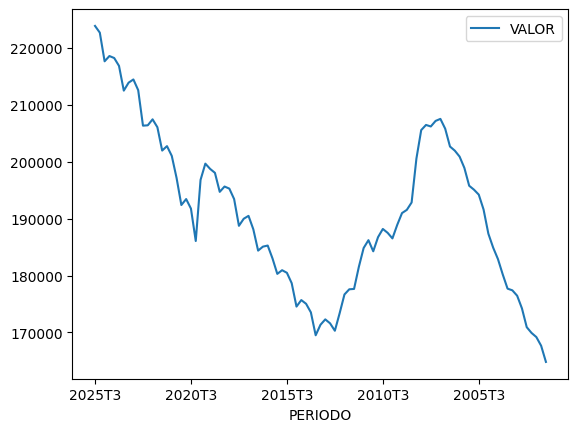

In [22]:
epa.plot(x="PERIODO")

In [23]:
APE = pd.read_csv(r"C:\Users\GPSantana\Downloads\Actividad,paro,empleo.csv", sep=";",encoding='latin1')

APE

,Sexo,Provincias,Tasas,Periodo,Total
0,Ambos sexos,Total Nacional,Tasa de actividad,2025T3,"59,30"
1,Ambos sexos,Total Nacional,Tasa de actividad,2025T2,"59,03"
2,Ambos sexos,Total Nacional,Tasa de actividad,2025T1,"58,57"
3,Ambos sexos,Total Nacional,Tasa de actividad,2024T4,"58,49"
4,Ambos sexos,Total Nacional,Tasa de actividad,2024T3,"59,04"
...,...,...,...,...,...
280,Ambos sexos,Total Nacional,Tasa de empleo de la población,2003T1,"48,65"
281,Ambos sexos,Total Nacional,Tasa de empleo de la población,2002T4,"48,57"
282,Ambos sexos,Total Nacional,Tasa de empleo de la población,2002T3,"48,61"
283,Ambos sexos,Total Nacional,Tasa de empleo de la población,2002T2,"48,40"


In [24]:
APE=APE[["Tasas","Periodo","Total"]]

 

APE

,Tasas,Periodo,Total
0,Tasa de actividad,2025T3,"59,30"
1,Tasa de actividad,2025T2,"59,03"
2,Tasa de actividad,2025T1,"58,57"
3,Tasa de actividad,2024T4,"58,49"
4,Tasa de actividad,2024T3,"59,04"
...,...,...,...
280,Tasa de empleo de la población,2003T1,"48,65"
281,Tasa de empleo de la población,2002T4,"48,57"
282,Tasa de empleo de la población,2002T3,"48,61"
283,Tasa de empleo de la población,2002T2,"48,40"


In [25]:
APE['Año'] = APE['Periodo'].str[:4].astype(int)

APE['Total'] = (
	APE['Total']
	.astype(str)
	.str.replace(".", "", regex=False)
	.str.replace(",", ".", regex=False)
	.astype(float)
)

APE_anual = APE.groupby(['Tasas', 'Año'])['Total'].mean().reset_index()

APE_anual

C:\Users\GPSantana\AppData\Local\Temp\ipykernel_12772\869998043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  APE['Año'] = APE['Periodo'].str[:4].astype(int)
C:\Users\GPSantana\AppData\Local\Temp\ipykernel_12772\869998043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  APE['Total'] = (


,Tasas,Año,Total
0,Tasa de actividad,2002,54.6025
1,Tasa de actividad,2003,55.8325
2,Tasa de actividad,2004,56.7100
3,Tasa de actividad,2005,57.7950
4,Tasa de actividad,2006,58.6375
...,...,...,...
67,Tasa de paro de la población,2021,14.9200
68,Tasa de paro de la población,2022,13.0350
69,Tasa de paro de la población,2023,12.1850
70,Tasa de paro de la población,2024,11.3450


In [26]:
APE_anual1=APE_anual.copy()

APE_anual1['Tasas'] = APE_anual1['Tasas'].replace({
    'Tasa de actividad': 'tasa_actividad',
    'Tasa de paro de la población': 'tasa_paro'
})

df_final = APE_anual1.pivot(index='Año', columns='Tasas', values='Total').reset_index()

df_final = df_final.rename(columns={'Año': 'Periodo',"tasa_actividad":"Tasa de Actividad",
"tasa_paro": "Tasa de Paro"})

df_final.iloc[:, 1:] = df_final.iloc[:, 1:].round(1)

df_final

Tasas,Periodo,Tasa de empleo de la población,Tasa de Actividad,Tasa de Paro
0,2002,48.4,54.6,11.4
1,2003,49.4,55.8,11.5
2,2004,50.5,56.7,11.0
3,2005,52.5,57.8,9.2
4,2006,53.7,58.6,8.5
5,2007,54.4,59.3,8.2
6,2008,53.3,60.1,11.2
7,2009,49.4,60.2,17.9
8,2010,48.3,60.3,19.9
9,2011,47.4,60.3,21.4


In [27]:
df_final.to_csv(r"C:\Users\GPSantana\Downloads\tasas.csv", index=False)

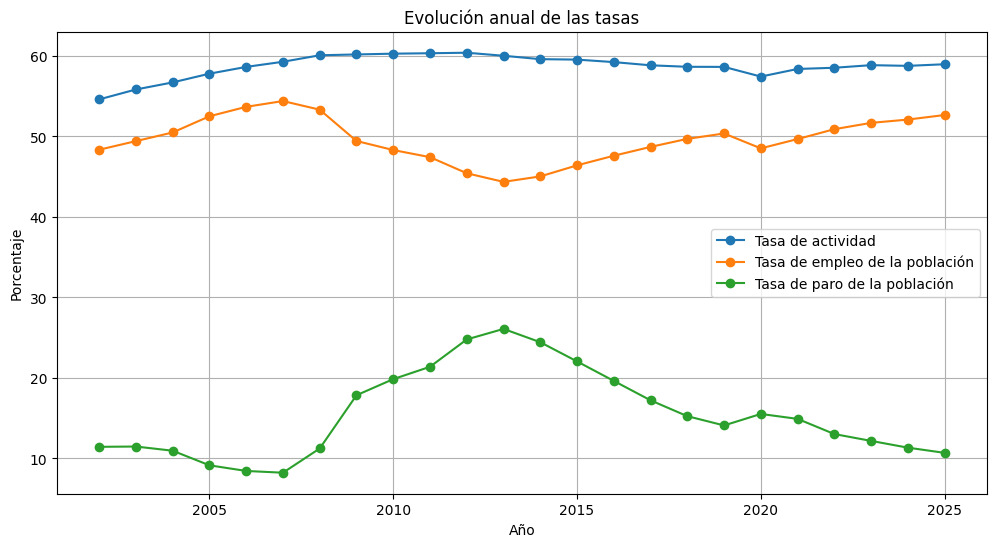

In [28]:

plt.figure(figsize=(12,6))

for tasa in APE_anual['Tasas'].unique():
    df_tasa = APE_anual[APE_anual['Tasas'] == tasa].sort_values('Año')
    plt.plot(df_tasa['Año'], df_tasa['Total'], marker='o', label=tasa)

plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.title('Evolución anual de las tasas')
plt.grid(True)
plt.legend()
plt.show()